# Sales Prediction

#### Problem Statement
Build a model which predicts sales based on the money spent on different platforms for marketing.

#### Data
Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.

In this notebook, we'll build a linear regression model to predict Sales using an appropriate predictor variable

### Steps

1. Import required Library
2. Reading and Understanding the Data
3. EDA
4. Feature Engineering
5. Model Building

In [1]:
#1. Import required Library
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

#Stats Model
import statsmodels.stats.diagnostic as diag
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
import statsmodels.tsa.api as smt
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sms
from statsmodels.graphics.gofplots import qqplot_2samples

In [2]:
advertising = pd.DataFrame(pd.read_csv("advertising.csv"))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
# Checking Null values
advertising.isnull().sum()*100/advertising.shape[0]
# There are no NULL values in the dataset, hence it is clean.

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

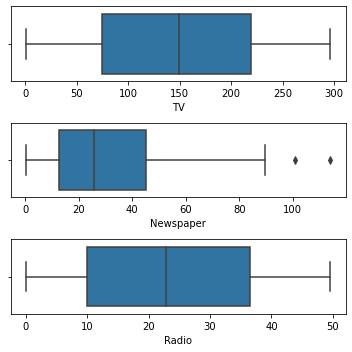

In [7]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

- There are no considerable outliers present in the data.


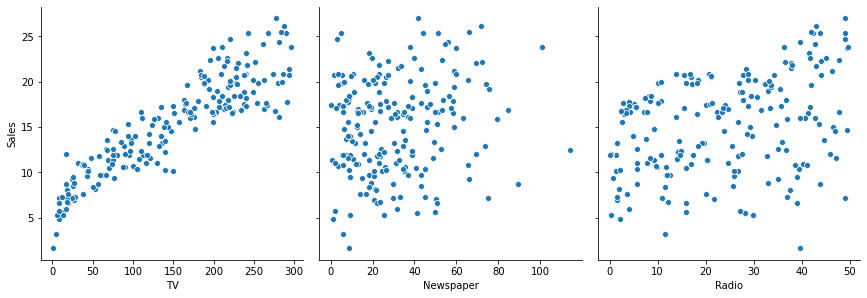

In [8]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

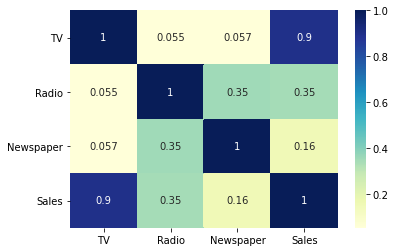

In [9]:
# Let's see the correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable **TV** seems to be most correlated with **Sales**. So let's go ahead and perform simple linear regression using **TV** as our feature variable.

## Model Building

### Performing Simple Linear Regression

    Equation of linear regression
        y=c+m1x1+m2x2+...+mnxn 
        y  is the response
        c  is the intercept
        m1  is the coefficient for the first feature
        mn  is the coefficient for the nth feature
    In our case:

          y=c+m1×TV 

    The  m  values are called the model coefficients or model parameters.
    
   --------------------------------------------------------------------------------------------------------------------------
    
**Generic Steps in model building using statsmodels**

We first assign the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y.

In [10]:
X = advertising['TV']
y = advertising['Sales']

#### Train-Test Split
You now need to split our variable into training and testing sets. You'll perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [12]:
# Let's now take a look at the train dataset

X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [13]:
y_train.head()


74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

**Building a Linear Model**

You first need to import the statsmodel.api library using which you'll perform the linear regression.

In [14]:
import statsmodels.api as sm

By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [15]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [16]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [17]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 01 May 2021   Prob (F-statistic):           1.52e-52
Time:                        16:28:42   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

#### Looking at some key statistics from the summary

**The values we are concerned with are -**

    The coefficients and significance (p-values)
    R-squared
    F statistic and its significance
    
    
1. The coefficient for TV is 0.054, with a very low p value
   
   The coefficient is statistically significant. So the association is not purely by chance


2. R - squared is 0.816
    
   Meaning that 81.6% of the variance in Sales is explained by TV

    This is a decent R-squared value



3. F statistic has a very low p value (practically low)
    
   Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
---
**The fit is significant. Let's visualize how well the model fit the data.**

From the parameters that we get, our linear regression equation becomes:

**Sales=6.948+0.054×TV**

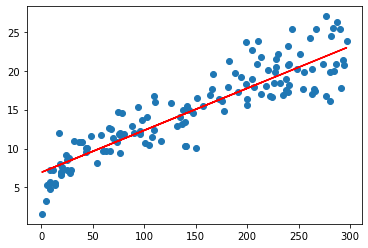

In [18]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

### Model Evaluation

#### Residual analysis

To validate assumptions of the model, and hence the reliability for inference

Distribution of the error terms

We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [22]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

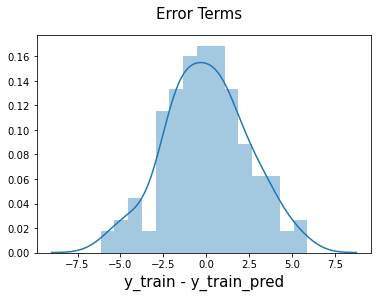

In [23]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

### Predictions on the Test Set
Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the X_test data like you did for X_train and then you can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [24]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [25]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [27]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966233

In [28]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7921031601245658

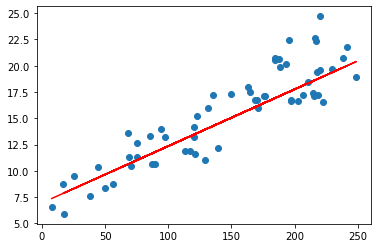

In [29]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

In [30]:
# perform Durbin-Watson test

durbin_watson(lr.resid)

2.1960352247278996

In [31]:
# Breusch-Pagan - Check for 
test = diag.het_breuschpagan(lr.resid, lr.model.exog)
lzip(['TV','2'], test)

[('TV', 10.100148467355208)]

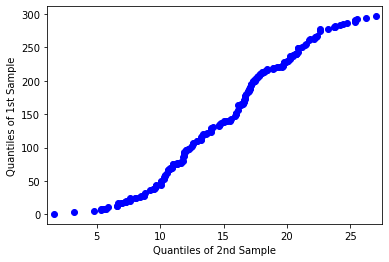

In [32]:
# Create QQ plot
pp_x = sms.ProbPlot(X)
pp_y = sms.ProbPlot(y)
qqplot_2samples(pp_x, pp_y)
plt.show()

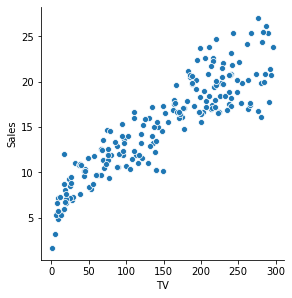

In [33]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(advertising, x_vars=['TV'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()